# <center>Credit Card Fraud Detection</center>

## Mini project Objective
Based on the input dataset Creadit Card Fraud Detection: Is the transaction fraudulent or not by using NumPy

---

## Student Information

**Student:**
- Full Name: Cao Trần Bá Đạt
- Student ID: 23127168

**Class:** 23KHDL

## <center>DATA EXPLORATION</center>

### 1. Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read file

In [2]:
path = '../data/raw/creditcard.csv'
df = np.genfromtxt(path, delimiter=',', skip_header = 1, dtype=str)

print("="*60)
print("DATASET LOADED")
print("="*60)
print(f"Shape: {df.shape}")
print(f"  Rows: {df.shape[0]} transactions")
print(f"  Columns: {df.shape[1]}") 

columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
           'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
           'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

print("Columns names:")
for col in columns:
    print(f" - {col}")

DATASET LOADED
Shape: (284807, 31)
  Rows: 284807 transactions
  Columns: 31
Columns names:
 - Time
 - V1
 - V2
 - V3
 - V4
 - V5
 - V6
 - V7
 - V8
 - V9
 - V10
 - V11
 - V12
 - V13
 - V14
 - V15
 - V16
 - V17
 - V18
 - V19
 - V20
 - V21
 - V22
 - V23
 - V24
 - V25
 - V26
 - V27
 - V28
 - Amount
 - Class


### 3. Statistic.

#### 3.1 Print 5 first rows

In [3]:
print("Five sample rows:")
for row in df[0:5]:
    print(f"  {row}")

Five sample rows:
  ['0' '-1.3598071336738' '-0.0727811733098497' '2.53634673796914'
 '1.37815522427443' '-0.338320769942518' '0.462387777762292'
 '0.239598554061257' '0.0986979012610507' '0.363786969611213'
 '0.0907941719789316' '-0.551599533260813' '-0.617800855762348'
 '-0.991389847235408' '-0.311169353699879' '1.46817697209427'
 '-0.470400525259478' '0.207971241929242' '0.0257905801985591'
 '0.403992960255733' '0.251412098239705' '-0.018306777944153'
 '0.277837575558899' '-0.110473910188767' '0.0669280749146731'
 '0.128539358273528' '-0.189114843888824' '0.133558376740387'
 '-0.0210530534538215' '149.62' '"0"']
  ['0' '1.19185711131486' '0.26615071205963' '0.16648011335321'
 '0.448154078460911' '0.0600176492822243' '-0.0823608088155687'
 '-0.0788029833323113' '0.0851016549148104' '-0.255425128109186'
 '-0.166974414004614' '1.61272666105479' '1.06523531137287'
 '0.48909501589608' '-0.143772296441519' '0.635558093258208'
 '0.463917041022171' '-0.114804663102346' '-0.183361270123994'


### 3.2 Handle datatype in column "class"

In [4]:
df[:,-1] = np.char.strip(df[:,-1], '""')  # Remove any trailing spaces in the 'Class' column
print(df[:,-1])

['0' '0' '0' ... '0' '0' '0']


#### 3.3 Convert the data type of the dataset from string to float

In [5]:
df = df.astype(np.float32)

### 3.4 Find duplicate rows and missing columns

In [6]:
n_dupplicate_rows = df.shape[0] - np.unique(df, axis=0).shape[0]
print(f"Number of duplicate rows: {n_dupplicate_rows}")

missing_columns = []
for i in range(df.shape[1]):
    n_missing = np.sum(np.isnan(df[:,i]))
    if n_missing > 0:
        missing_columns.append((columns[i], n_missing))
if missing_columns:
    print("Columns with missing values:")
    for col, n_missing in missing_columns:
        print(f" - {col}: {n_missing} missing values")
else:
    print("No missing values found in any column.")

Number of duplicate rows: 1081
No missing values found in any column.


### 3.5 Delete duplicate rows

In [7]:
unique_rows, unique_indices = np.unique(df, axis=0, return_index=True)
sorted_indices = np.sort(unique_indices)
df = df[sorted_indices]

print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (283726, 31)


### 3.6 Some distributions

### 3.6.1 Distributions for all transactions

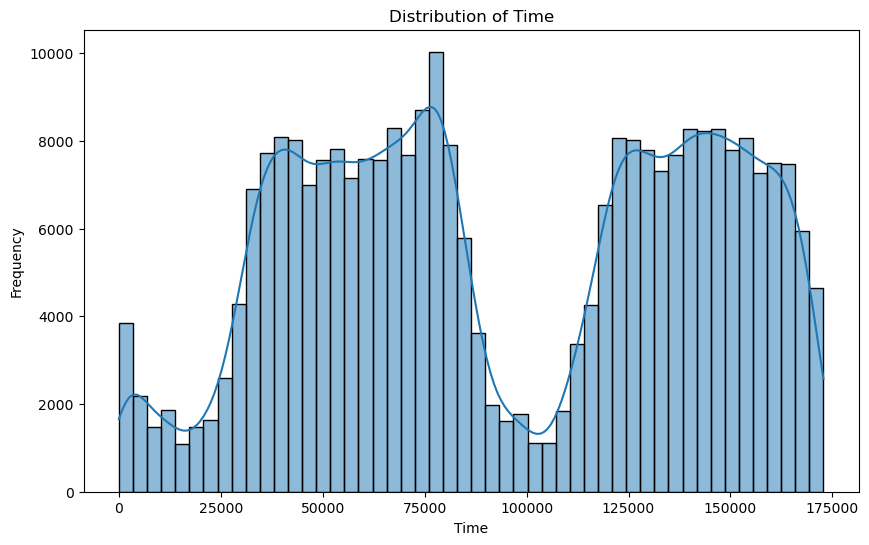

In [8]:
distribution_of_time = df[:,0]
plt.figure(figsize=(10, 6))
sns.histplot(distribution_of_time, bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

The Histogram combined with the KDE (Kernel Density Estimate) line shows a very clear Bimodal Distribution.

- X-axis: Represents the number of seconds that have passed since the first transaction (from 0 to approximately 175,000 seconds).

- Y-axis: Frequency (number of transactions) that occurred at that time.

This data set records transactions within 2 days (48 hours). We can convert time to understand better:

- 1 day = 24 hours × 60 minutes × 60 seconds = 86,400 seconds.

- 2 days = 172,800 seconds.

Looking at the chart, we see a perfect correlation with the human life cycle:

- Two big peaks (Peaks): Corresponds to the daytime period of two consecutive days. This is when people are awake and do the most shopping.

- Valley in the middle (Valley): The lowest trough is around the 90,000th - 100,000th second.

    - This time corresponds to the late night/early morning of the first day turning into the second day.

    - The number of transactions decreased sharply but did not reach 0 (there are still people trading at night or automated transactions).

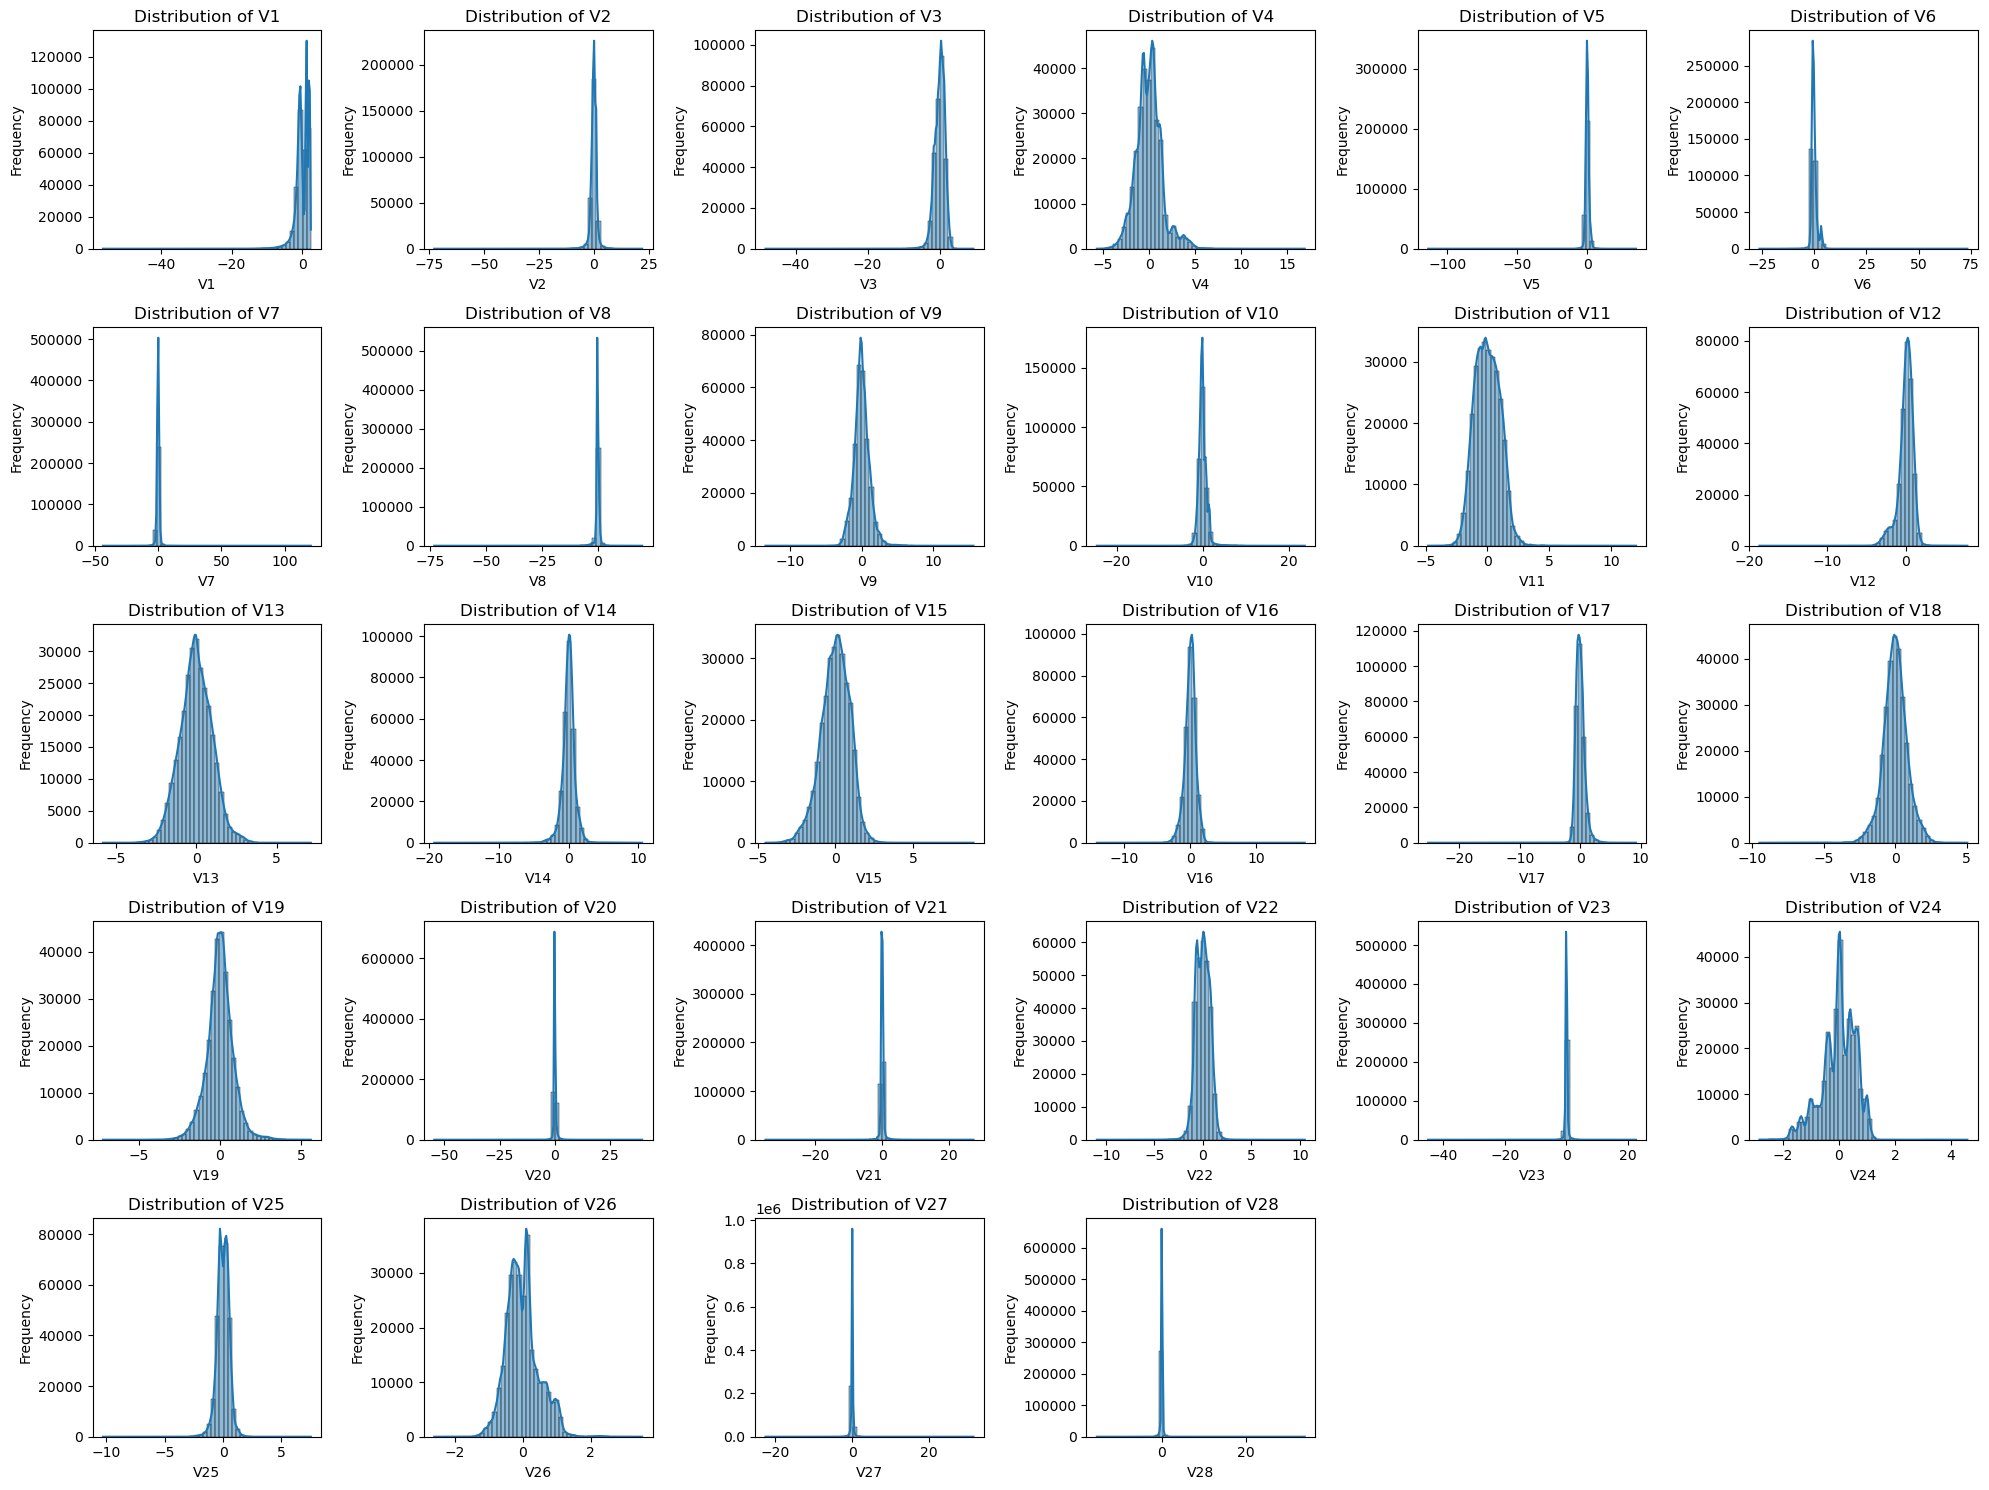

In [9]:
distribution_of_V = df[:,1:29]

plt.figure(figsize=(20, 15))
for i in range(distribution_of_V.shape[1]):
    plt.subplot(5, 6, i+1)
    sns.histplot(distribution_of_V[:,i], bins=50, kde=True)
    plt.title(f'Distribution of V{i+1}')
    plt.xlabel(f'V{i+1}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Most columns (like V1, V2...) will have a bell-shaped distribution, which is close to a Gaussian/Normal Distribution.

- However, some columns may be skewed or have heavy tails.

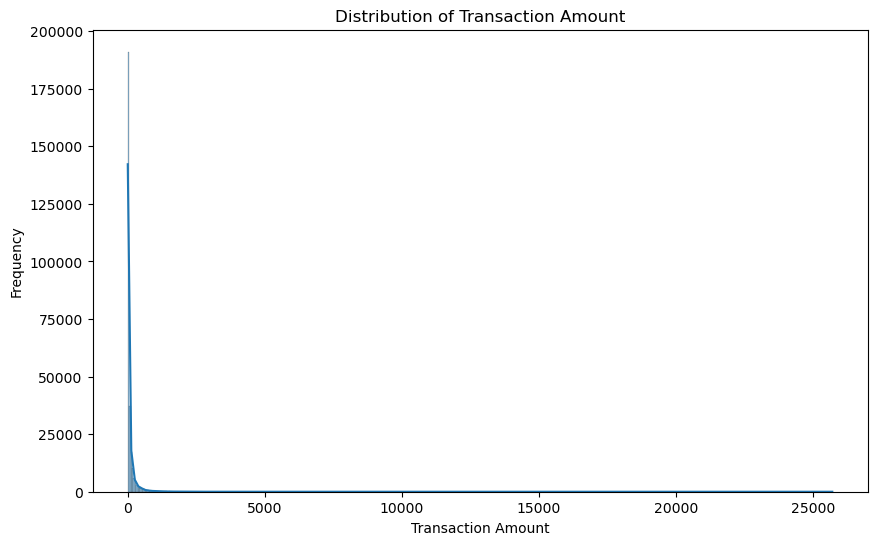

In [10]:
distribution_of_transaction_amount = df[:,29]
plt.figure(figsize=(10, 6))
sns.histplot(distribution_of_transaction_amount, bins=500, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

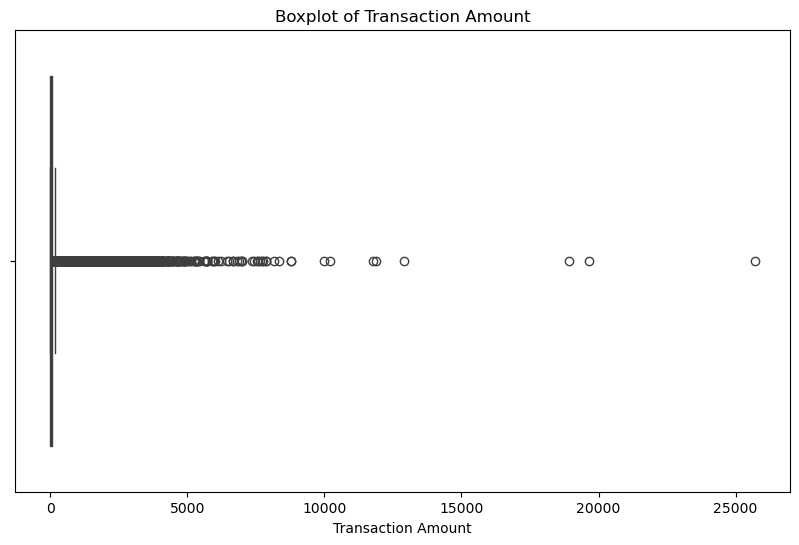

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=distribution_of_transaction_amount)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

- Left-skewed peak: Concentrated densely at small values ​​(around 0 - 100 USD). This reflects the fact that the majority of daily credit card transactions are small expenses.

- Long Tail: Extends very far to large values ​​(thousands or tens of thousands of USD). These are large purchases but appear very low in frequency.

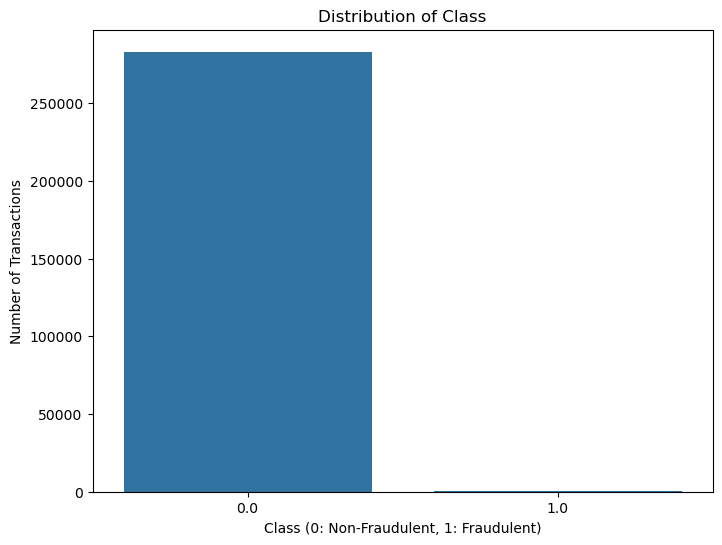

In [12]:
distribution_of_class = df[:,-1]
unique, counts = np.unique(distribution_of_class, return_counts=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=unique, y=counts)
plt.title('Distribution of Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.show()

The graph shows the distribution of the Class variable (0 = valid transaction, 1 = fraud). Results:

- Class 0 (Non-Fraudulent):

    - Overwhelming number: more than 280,000 transactions.

    - Almost the entire dataset.

- Class 1 (Fraudulent):

    - Very few, only about 400–500 transactions.

    - < 0.2% of the entire dataset.

In [13]:
percent_frauds = (counts[1] / np.sum(counts)) * 100
print(f"Percentage of fraudulent transactions: {percent_frauds:.4f}%")

percent_not_frauds = (counts[0] / np.sum(counts)) * 100
print(f"Percentage of non-fraudulent transactions: {percent_not_frauds:.4f}%")

Percentage of fraudulent transactions: 0.1667%
Percentage of non-fraudulent transactions: 99.8333%


### 3.6.2 Compare two class 

In [14]:
fraud_df = df[df[:,-1] == 1]
non_fraud_df = df[df[:,-1] == 0]

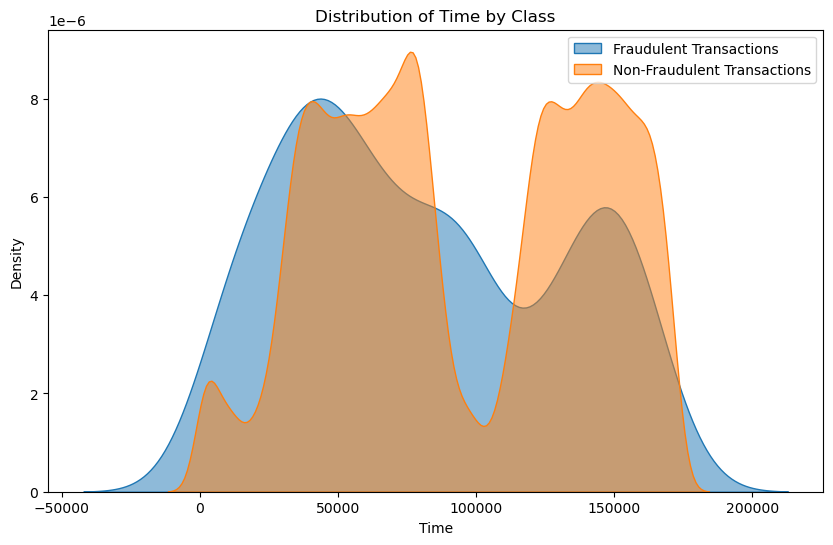

In [15]:
both_df = [fraud_df, non_fraud_df]
group_labels = ['Fraudulent Transactions', 'Non-Fraudulent Transactions']

dis_time_2_class = [data[:,0] for data in both_df]
plt.figure(figsize=(10, 6))
for i, data in enumerate(dis_time_2_class):
    sns.kdeplot(data, label=group_labels[i], fill=True, alpha=0.5)
plt.title('Distribution of Time by Class')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

Normal Transaction Distribution (Class 0 - Normal)
- Shape: Has a very distinct Bimodal shape and curves like a sinusoid.

- Meaning: It reflects the natural biological rhythm of humans.

- Transactions increase during the day (office hours, evening).

- Decrease to the bottom at night (when people go to sleep).

- Repeat this cycle for 2 days (because the data is collected in 48 hours).

Fraud Transaction Distribution (Class 1 - Fraud)
- Shape: Usually flatter and does not follow a clear day/night cycle like regular transactions.

- Key Features: You will see that during the "late night" hours (when transactions usually drop to the bottom), fraudulent transactions still appear scattered, even the rate of fraud to total transactions at this time is higher than during the day.

- Insight: Fraudsters (or automated bots) operate non-stop, or they deliberately choose "dead" hours (when cardholders are sleeping) to perform their actions to avoid being detected by balance fluctuation messages.

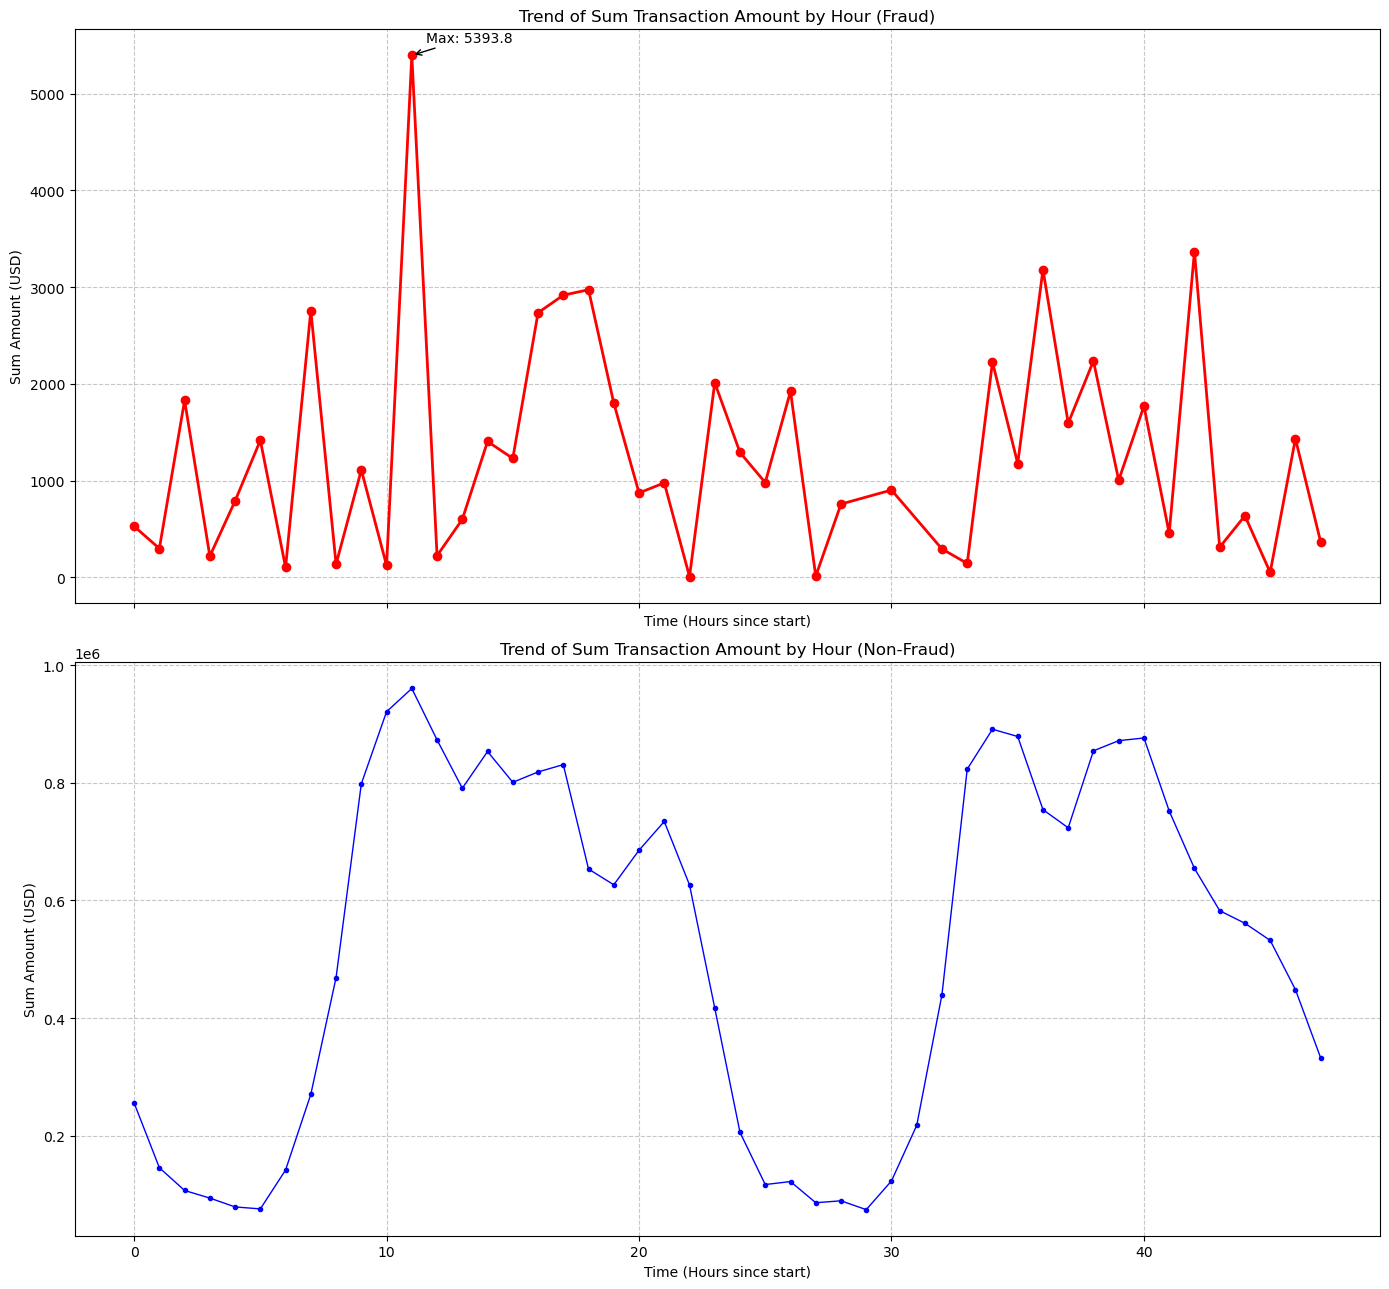

In [16]:
col_time = 0
col_amount = 29 

def aggregate_sum_by_hour(data_array):
    """
    Input: data_array (mảng 2D chứa cột Time và Amount)
    Output: unique_hours, mean_amounts
    """
    times = data_array[:, 0]
    amounts = data_array[:, 29] 
    
    hours = (times // 3600).astype(int)
    
    unique_hours = np.unique(hours)
    
    mean_amounts = []
    for h in unique_hours:
        amounts_in_hour = amounts[hours == h]
        mean_amounts.append(np.sum(amounts_in_hour))
        
    return unique_hours, np.array(mean_amounts)

fraud_hours, fraud_sum = aggregate_sum_by_hour(fraud_df)

non_fraud_hours, non_fraud_sum = aggregate_sum_by_hour(non_fraud_df)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13), sharex=True)

ax1.plot(fraud_hours, fraud_sum, color='red', marker='o', linestyle='-', linewidth=2)
ax1.set_title('Trend of Sum Transaction Amount by Hour (Fraud)')
ax1.set_xlabel('Time (Hours since start)')
ax1.set_ylabel('Sum Amount (USD)')
ax1.grid(True, linestyle='--', alpha=0.7)

max_fraud = np.max(fraud_sum)
ax1.annotate(f'Max: {max_fraud:.1f}', 
             xy=(fraud_hours[np.argmax(fraud_sum)], max_fraud),
             xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

ax2.plot(non_fraud_hours, non_fraud_sum, color='blue', marker='.', linestyle='-', linewidth=1)
ax2.set_title('Trend of Sum Transaction Amount by Hour (Non-Fraud)')
ax2.set_xlabel('Time (Hours since start)')
ax2.set_ylabel('Sum Amount (USD)')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**1. Fraud trading trends (red graph)**

Notable features:

- Very strong and erratic fluctuations, not following a clear cycle.

- Some hours have extremely high trading peaks, for example:

    - Hour ~13 has an average of up to 5393.8 USD (highest peak).

- In the remaining hours, the value fluctuates strongly:

    - Some hours are only a few hundred USD.

    - Some hours increase to 2,000–3,000 USD.

Significance:

- Fraudulent transactions do not follow normal consumer behavior.

- Fraud transactions usually:

    - Have a very high average value.

    - Appear sporadically, regardless of the time of day/night.

    - The high level of volatility reflects that fraudsters often create transactions with unusual values.

**2. Non-Fraud Trading Trends (Blue Graph)**

Highlights

- Non-Fraud Trading has:

    - Average level is quite low, mainly from 60–110 USD.

    - Slight fluctuations, no sudden peaks.

    - More obvious cyclical characteristics:

        - Strong increase around hour 9–12 (~110 USD).

        - Gradually decreases then increases slightly again at hour 30–40.

Significance

- This is a characteristic of normal trading behavior, reflecting:

    - Stable spending level.

    - No large transactions.

    - Regular over time (life cycle).

**3. Key Point**

→ Amount is a feature that is extremely differentiating between Fraud and Non-Fraud, because Fraud has unusually large value transactions.

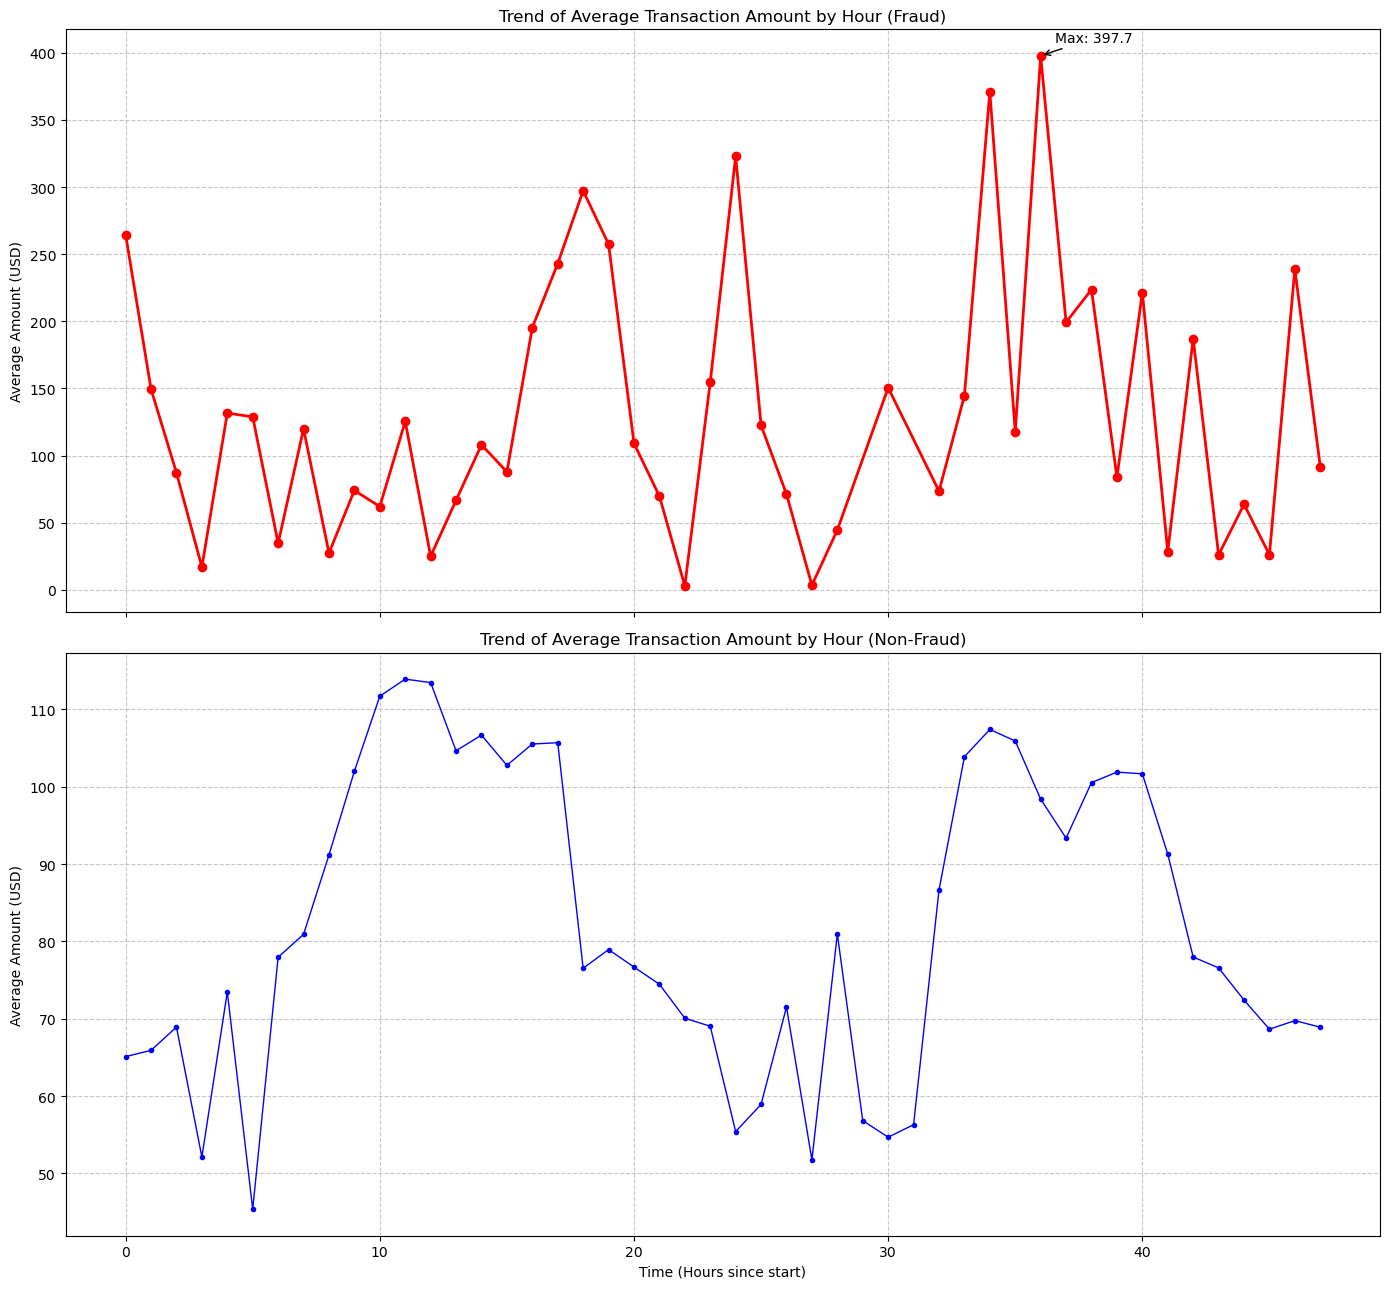

In [17]:
def aggregate_avr_by_hour(data_array):
    times = data_array[:, 0]
    amounts = data_array[:, 29] 
    
    hours = (times // 3600).astype(int)
    
    unique_hours = np.unique(hours)
    
    mean_amounts = []
    for h in unique_hours:
        # Lấy tất cả amount thuộc giờ h
        amounts_in_hour = amounts[hours == h]
        # Tính trung bình
        mean_amounts.append(np.mean(amounts_in_hour))
        
    return unique_hours, np.array(mean_amounts)

# --- XỬ LÝ DỮ LIỆU ---
# Tính toán xu hướng cho Fraud
fraud_hours, fraud_means = aggregate_avr_by_hour(fraud_df)

# Tính toán xu hướng cho Non-Fraud
non_fraud_hours, non_fraud_means = aggregate_avr_by_hour(non_fraud_df)

# --- VẼ BIỂU ĐỒ ĐƯỜNG (2 Subplots) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13), sharex=True)

# Biểu đồ 1: Xu hướng Gian lận (Fraud)
ax1.plot(fraud_hours, fraud_means, color='red', marker='o', linestyle='-', linewidth=2)
ax1.set_title('Trend of Average Transaction Amount by Hour (Fraud)')
ax1.set_ylabel('Average Amount (USD)')
ax1.grid(True, linestyle='--', alpha=0.7)
# Đánh dấu các đỉnh cao đột biến
max_fraud = np.max(fraud_means)
ax1.annotate(f'Max: {max_fraud:.1f}', 
             xy=(fraud_hours[np.argmax(fraud_means)], max_fraud),
             xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Biểu đồ 2: Xu hướng Bình thường (Non-Fraud)
ax2.plot(non_fraud_hours, non_fraud_means, color='blue', marker='.', linestyle='-', linewidth=1)
ax2.set_title('Trend of Average Transaction Amount by Hour (Non-Fraud)')
ax2.set_xlabel('Time (Hours since start)')
ax2.set_ylabel('Average Amount (USD)')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**1. Fraud Trading Trend**

Main Features

- The fraud chart fluctuates strongly and continuously, with high volatility.

- The average hourly trading is mainly in the range of 30–350 USD, with the highest peak at ~397.7 USD.

- There are many sudden increases and decreases, for example:

    - After hour ~20, there is a sudden spike to ~330 USD.

    - Then some time frames fall to a very low level near 0 and then bounce back strongly.

Behavioral Significance

- Fraud shows unstable behavior: erratic increase and decrease, without a clear rhythm.

- These fluctuations reflect that:

    - Fraudsters often make transactions with inconsistent amounts of money, sometimes very low but sometimes sudden increases.

    - Do not follow natural living rhythms or consumption habits.

Key Insight

→ Amount variance is a good distinguishing feature between fraud and non-fraud.
→ Spikes are a clear sign of fraudulent trading.

**2. Non-Fraud Transaction Trends**
Key Features

- The average value of Non-Fraud is much lower and more stable, fluctuating between 45–110 USD.

- There is a clear trend:

    - Gradually increasing around 5–12 hours (peaking at ~113 USD).

    - Gradually decreasing from 12–20 hours.

    - Slightly increasing again around 30–40 hours.

- There is no unusual “jump” like in Fraud.

Behavioral implications

- This is a stable consumption pattern, related to:

    - Life cycle (daytime – evening).

    - Regular spending habits (small purchases, service payments).

Key Insight

→ Non-Fraud has a very clear time pattern, while Fraud does not.

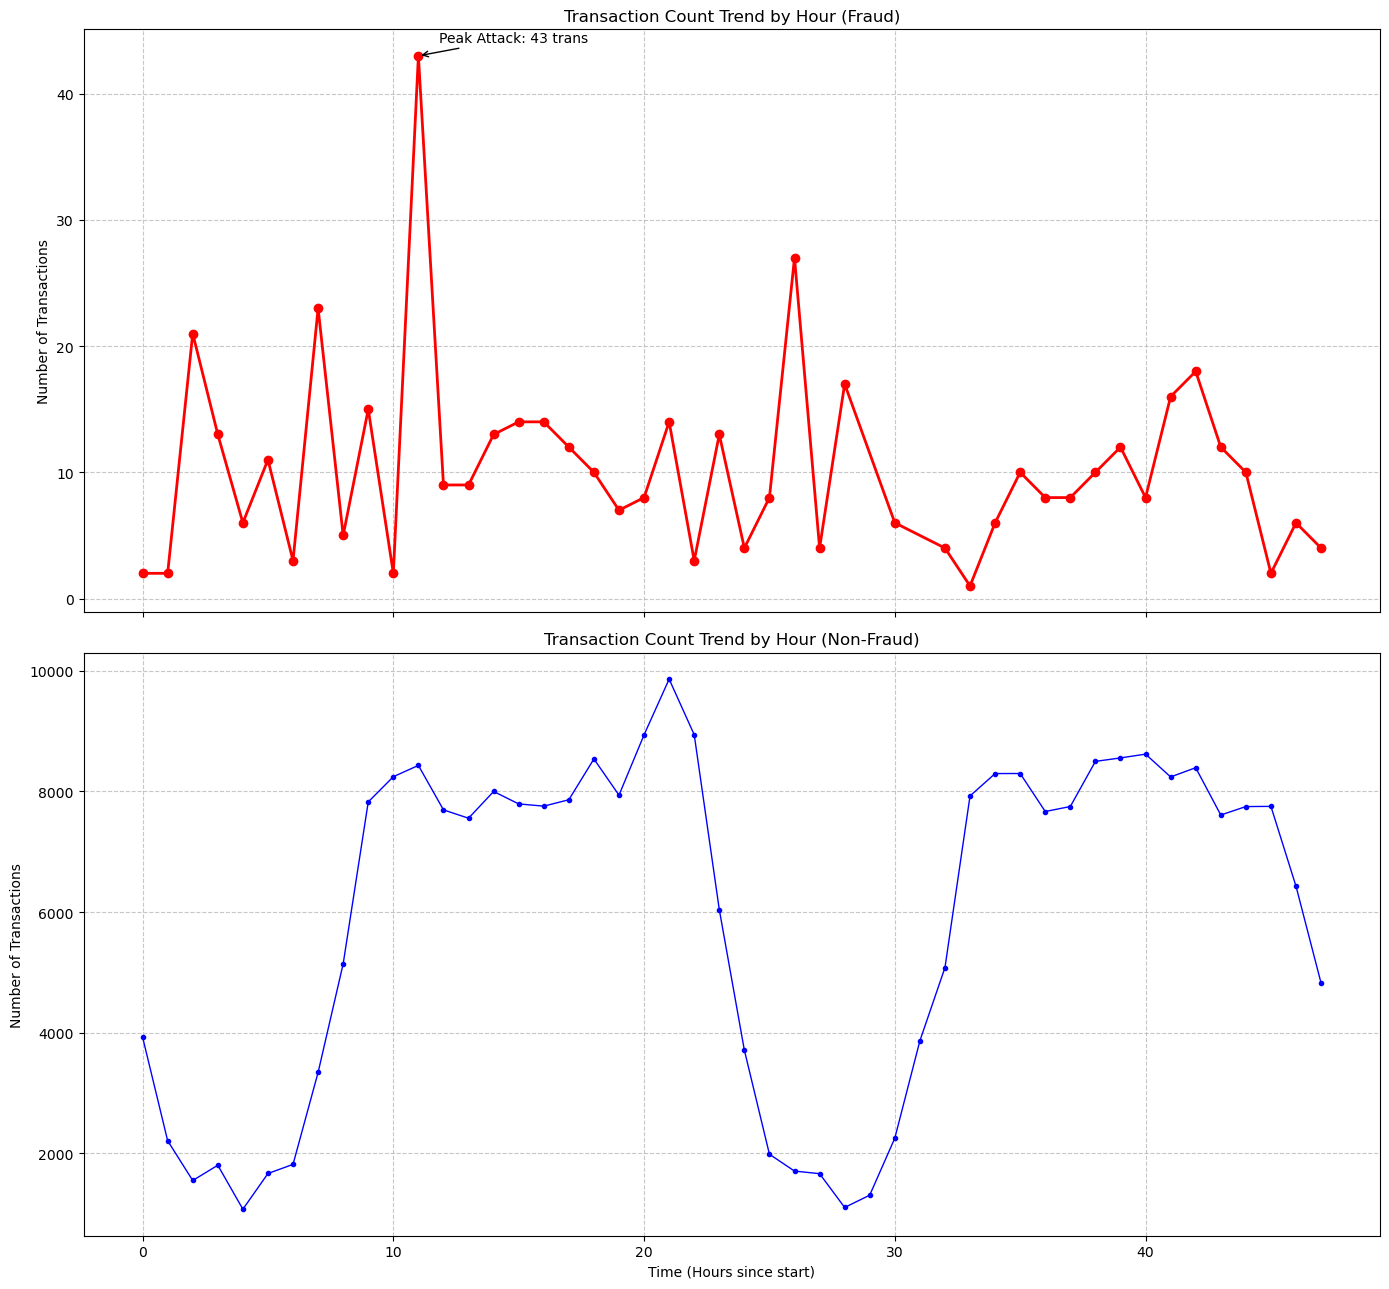

In [18]:
def aggregate_count_by_hour(data_array):
    """
    Input: mảng 2D (chứa cột Time)
    Output: unique_hours, transaction_counts
    """

    times = data_array[:, 0]
    
    hours = (times // 3600).astype(int)
    
    unique_hours, counts = np.unique(hours, return_counts=True)
        
    return unique_hours, counts

fraud_hours, fraud_counts = aggregate_count_by_hour(fraud_df)

non_fraud_hours, non_fraud_counts = aggregate_count_by_hour(non_fraud_df)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13), sharex=True)

ax1.plot(fraud_hours, fraud_counts, color='red', marker='o', linestyle='-', linewidth=2)
ax1.set_title('Transaction Count Trend by Hour (Fraud)')
ax1.set_ylabel('Number of Transactions')
ax1.grid(True, linestyle='--', alpha=0.7)

# Highlight giờ bị tấn công nhiều nhất
max_fraud_count = np.max(fraud_counts)
max_fraud_hour = fraud_hours[np.argmax(fraud_counts)]
ax1.annotate(f'Peak Attack: {max_fraud_count} trans', 
             xy=(max_fraud_hour, max_fraud_count),
             xytext=(15, 10), textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle="->"))

ax2.plot(non_fraud_hours, non_fraud_counts, color='blue', marker='.', linestyle='-', linewidth=1)
ax2.set_title('Transaction Count Trend by Hour (Non-Fraud)')
ax2.set_xlabel('Time (Hours since start)')
ax2.set_ylabel('Number of Transactions')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**1. Fraud Transaction Count (red)**
Highlights

- The number of fraud transactions per hour is very low, mostly in the range of 3–15 transactions/hour.

- There is a large fluctuation, no cyclical trend.

- Occasional abnormal peaks appear:

    - Highest peak: about 43 transactions at hour ~12 (marked “Peak Attack”).

Behavioral meaning

- Fraudsters often do not follow natural time behavior, so the number of fraud transactions:

    - Scattered, random

    - No day/night pattern

    - Occasional bursts in an hour (attack burst)

Important insight

- Fraud "bursts" like hour 12 with 43 transactions can be:

    - Attacking bots

    - Fraudulent scripts

    - Card testing batch

→ This is a strong signal for anomaly detection models to exploit.

**2. Non-Fraud Transaction Count (blue)**

Highlights

- The number of transactions per hour is very high, ranging from about 1,000 to 10,000 transactions.

- There is a clear trend:

    - Low in the early hours (~0–6).

    - Strong increase from hour 7 to about 20, reaching ~9,000–10,000 transactions/hour.

    - Decreases sharply from hour 20–30.

    - Steady increase from hour 30–44.

Behavioral implications

- Non-Fraud represents normal consumer behavior:

    - The day and early afternoon are the busiest times for transactions.

    - The number of transactions drops significantly at night.

- This is a very clear pattern of natural economic activity.

Key Insight

- The number of valid transactions follows a day-night cycle, while Fraud does not.

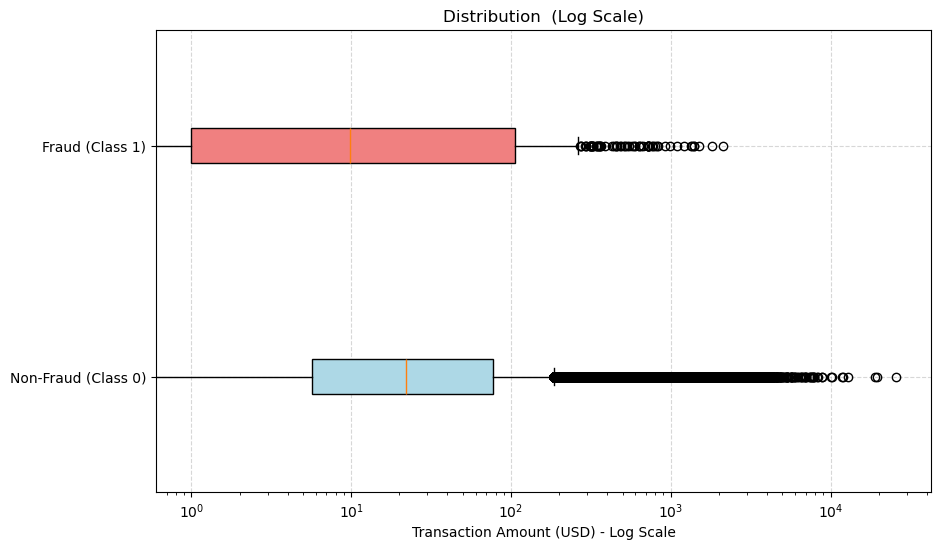

In [19]:
fraud_amounts = fraud_df[:, 29] 
non_fraud_amounts = non_fraud_df[:, 29]

plt.figure(figsize=(10, 6))

boxplots = plt.boxplot([non_fraud_amounts, fraud_amounts], 
                       vert=False, patch_artist=True,
                       labels=['Non-Fraud (Class 0)', 'Fraud (Class 1)'])

colors = ['lightblue', 'lightcoral']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

plt.xscale('log') 

plt.title('Distribution  (Log Scale)')
plt.xlabel('Transaction Amount (USD) - Log Scale')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

**1. Fraud Transactions – Amount Distribution (red)**
Key Features

- Fraud transactions have a median of ~30–50 USD (read from log-scale).

- The IQR is quite wide: ranging from about 5 USD → 200 USD.

- The number of outliers is large and the value is very high, up to more than 1,000 USD, even ~2,000–3,000 USD.

- On the log scale, Fraud shows a distribution that is weak at the low end but evenly spread at the high end, showing many larger transactions than normal.

Significance

- Fraud is a group that tends to create transactions with large amounts, even though the median is not too high.

- The appearance of many high-value outliers reflects:

    - Fraudulent behavior often includes “cash withdrawal” or “big purchase” transactions.

    - There may be a batch attack or processing of payments of consecutive large transactions.

**2. Non-Fraud Transactions – Amount Distribution (Blue)**
Key Features

- The Non-Fraud median is slightly lower than Fraud (around 20–25 USD).

- The IQR ranges from around 5 USD → 60 USD, smaller than Fraud.

- Although there are many outliers (due to the large dataset), the majority of Non-Fraud transactions:

    - Concentrated at low levels, < 100 USD.

    - Few transactions exceed a few hundred USD compared to Fraud.

Significance

- Non-Fraud has a concentrated and stable distribution, similar to the normal spending pattern.

- Large outliers of Non-Fraud appear but:

    - Compared to Fraud, they are less at the level > 1,000 USD.

    - Distribution is thinner.

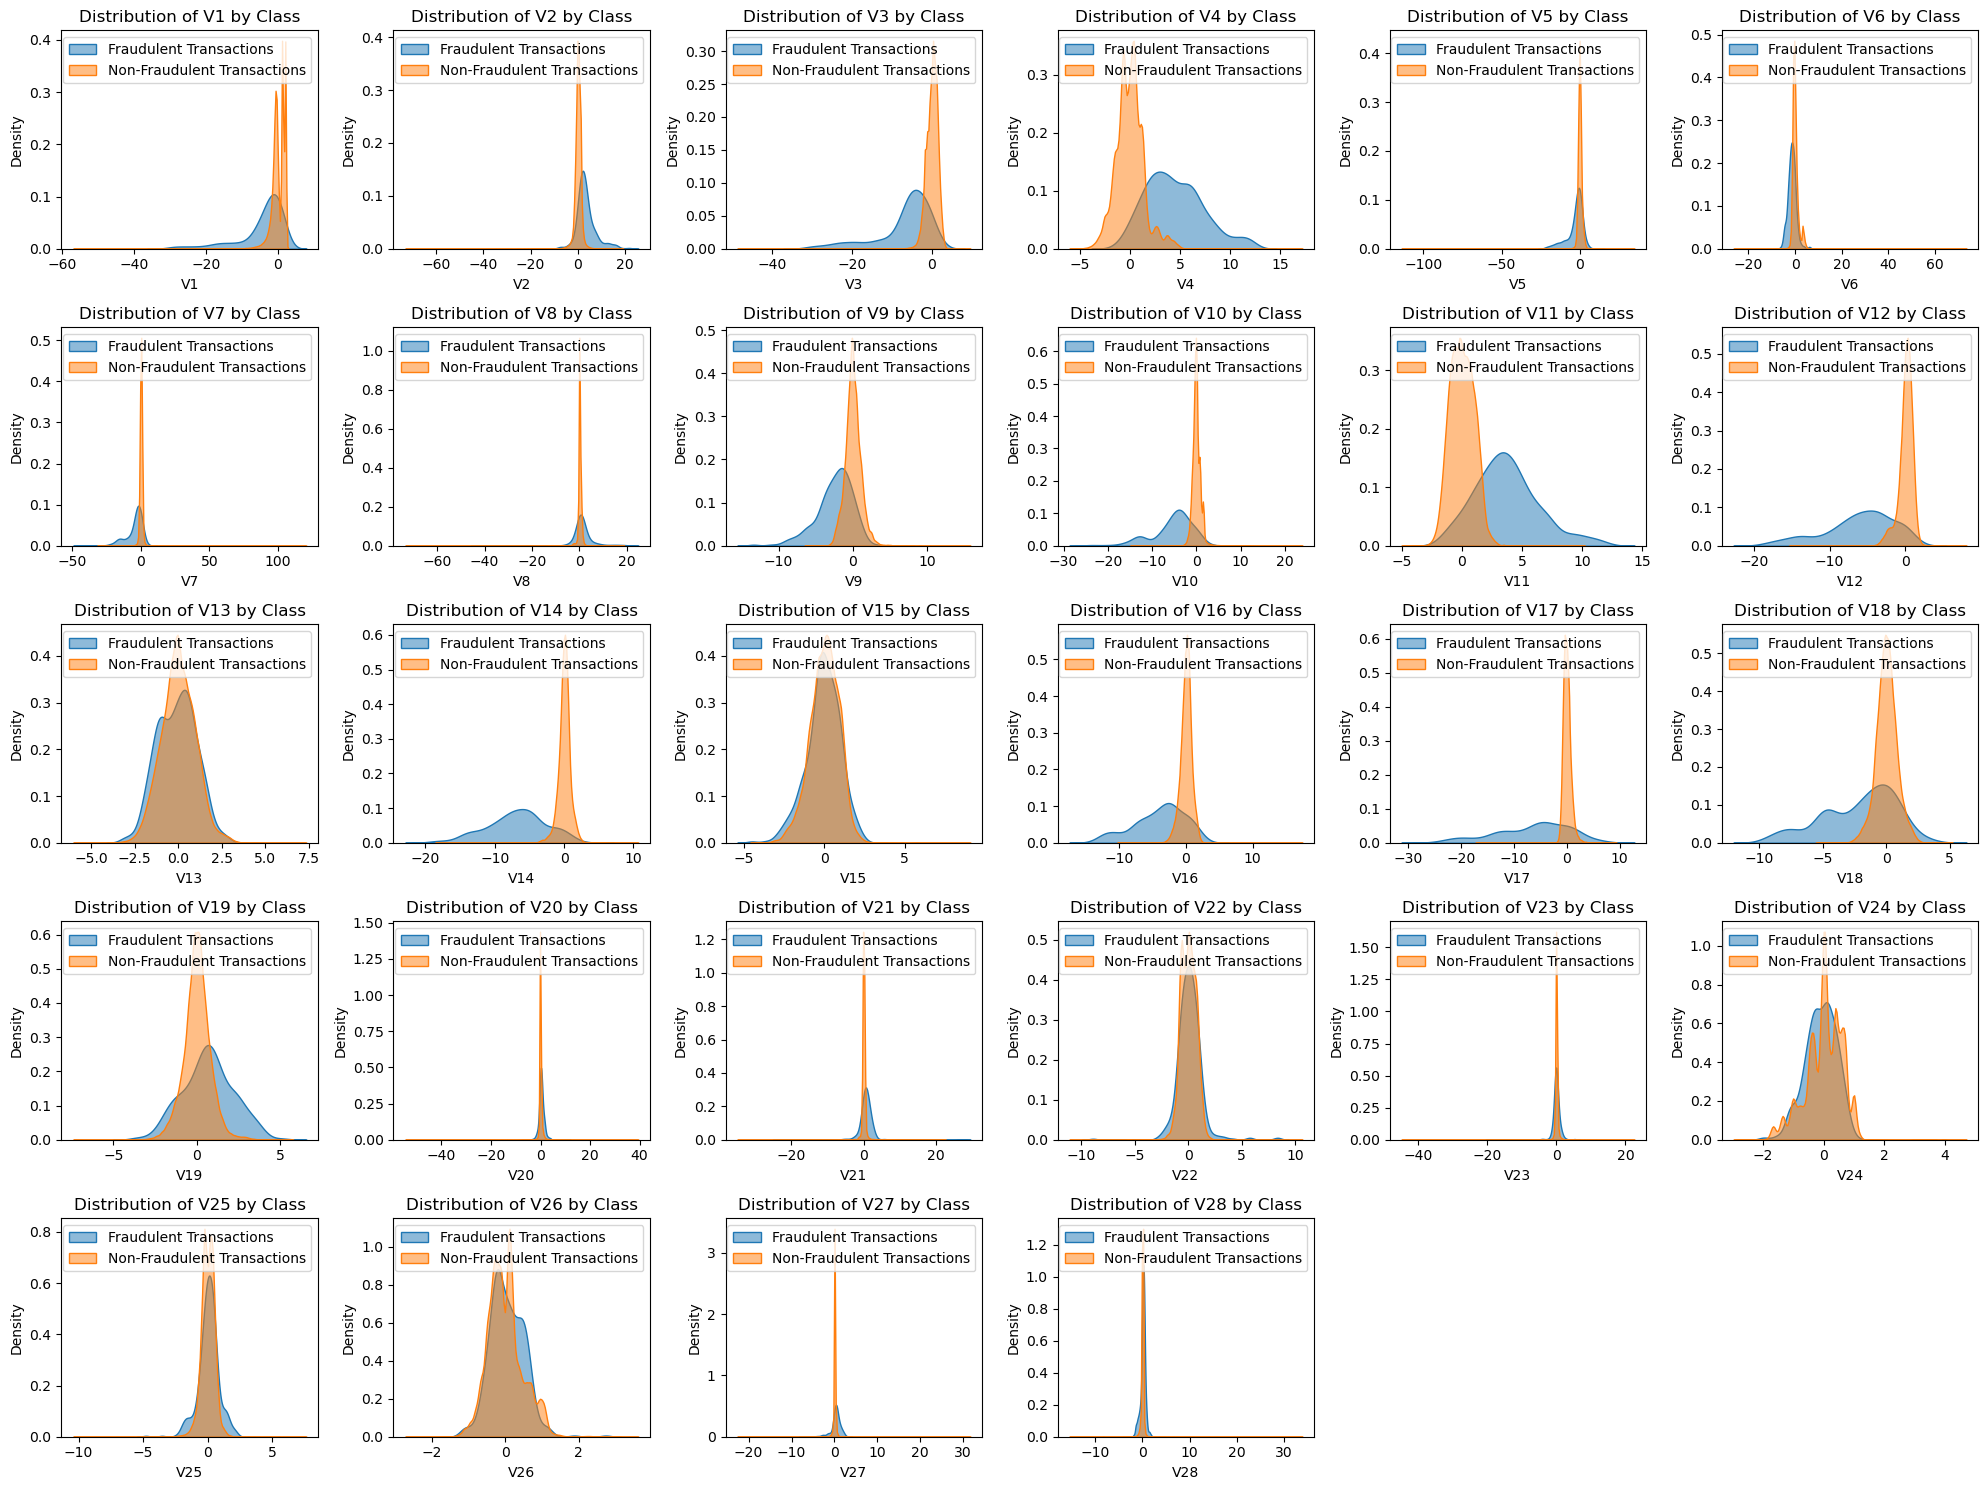

In [20]:
both = [fraud_df, non_fraud_df]
group_labels = ['Fraudulent Transactions', 'Non-Fraudulent Transactions']

plt.figure(figsize=(20, 15))
for i in range(distribution_of_V.shape[1]):
    plt.subplot(5, 6, i+1)
    for j, data in enumerate(both):
        sns.kdeplot(data[:, i+1], label=group_labels[j], fill=True, alpha=0.5)
    plt.title(f'Distribution of V{i+1} by Class')
    plt.xlabel(f'V{i+1}')
    plt.ylabel('Density')
    plt.legend()    
plt.tight_layout()

**1. Many features have significantly different distributions between Fraud and Non-Fraud**

Some variables have significantly skewed distributions between the two classes, meaning: Good classification ability in the logistic/ML model

- Notable variables: V1, V2, V3, V4 V10, V11, V12 V14, V16, V17, V18

- In these variables, the blue (Non-Fraud) and orange (Fraud) KDE curves deviate significantly, or even overlap very little.

- Implication: These are very powerful features for the model — they hold information that separates the two groups.

**2. Some variables have very similar distributions → low classification value**

- Variables with high overlap: V5, V6, V7, V13, V15, V18, V19, V20, V22, V23, V24, V25, V26, V27, V28

- Distributions are almost completely identical → meaning:  Not contributing much to the classification ability.

- Implication: These features can be retained, but are not expected to have much impact in the linear model.

**3. Overall: Fraud has a wide, skewed, and unusual distribution**

- Fraud usually has a wider distribution (large variance).

- Some variables have a clear right or left skew when compared to Non-Fraud.

Significance: 

- This is consistent with the nature of fraud: occurring in unusual situations → creating a different distribution.

**4. PCA data works as expected**

Since PCA is used to:

- de-correlate the original variables,

- retain the maximum variance,

-   create axes that allow for separation,

→ Therefore, it is reasonable that some principal components clearly separate Fraud/Non-Fraud.

Classification based on PCA features is often very effective, especially for logistic regression.

### 4. Correlation

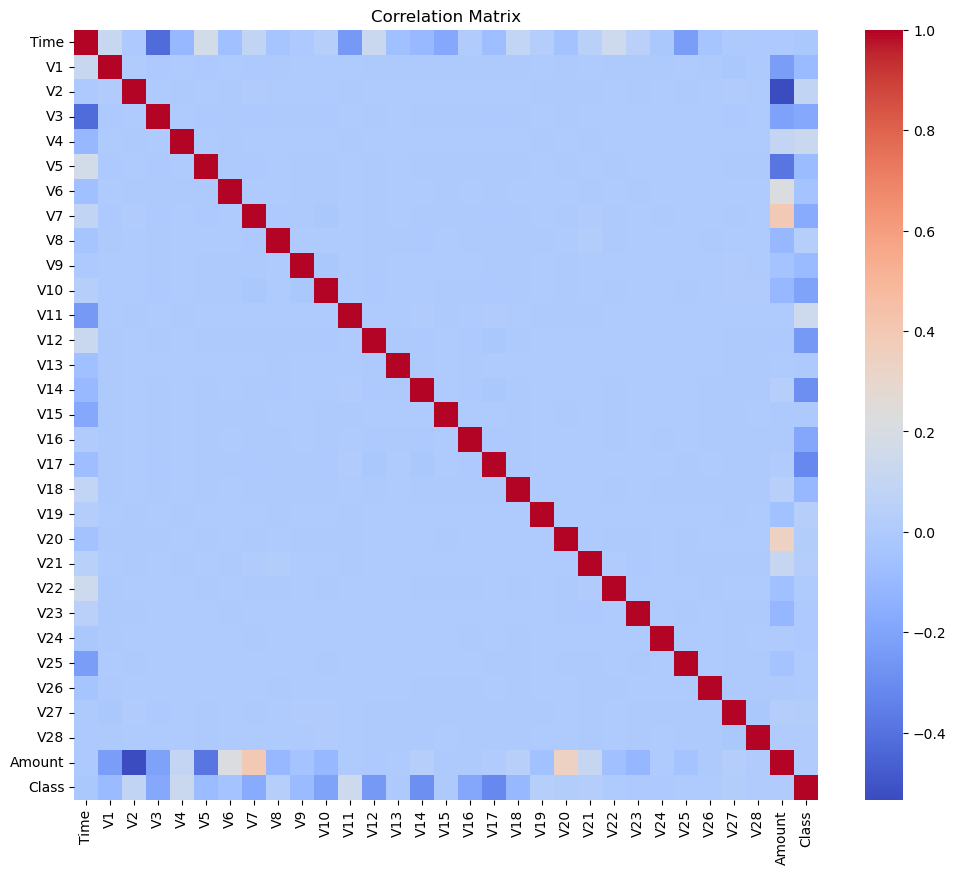

In [21]:
correlation_matrix = np.corrcoef(df, rowvar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, xticklabels=columns, yticklabels=columns, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

**1. PCA components V1–V28 have almost zero correlation**

Observation:

- The cells between V1–V28 are almost all light blue → very low |correlation|.

- The main diagonal is dark red because self-correlation = 1.

- There are no Vx–Vy pairs with strong correlation.

Significance:

- PCA has worked properly: it creates new linearly independent axes.

- There is no multicollinearity.

- Logistic Regression or Linear Model would be much more stable.


**2. Correlation between PCA components and Class is close to 0**

Most of the correlation values ​​between:

- V1–V28

- Class

are very small, in the range [-0.1, 0.1].

Important implications

- Linear correlation is not strong enough to distinguish Fraud.

- However, this does not mean that PCA components are useless — because:

- Logistic regression can still learn nonlinear boundaries from many features.

- These variables are still different in distribution (as you plotted in the KDE chart).

**3. Time is not significantly correlated with any variable**

- Time has very low correlation with most variables.

- This makes sense because Time is just the order of transactions over time, it does not carry information about the original PCA.

Significance

- Time is not a strong predictor in its original form.

- However, when converted to Hour of Day, it becomes a strong feature (as you analyzed in the previous chart).

**4. Amount has some slight correlation with some PCA components**

Some Vs such as V2, V4, V6, V7, V20, V21 have slight positive or negative correlation with Amount.

Significance

- Part of the PCA components are created from the features related to Amount in the original data.

- However, the correlation is still low.

**5. Correlation between Amount and Class is quite low (~0.01–0.05)**

This is quite important:

- Amount is not strongly linearly correlated with Class.

- But the distribution of Amount between Fraud and Non-Fraud is very different (as you can see in the boxplot → many Fraud outliers).

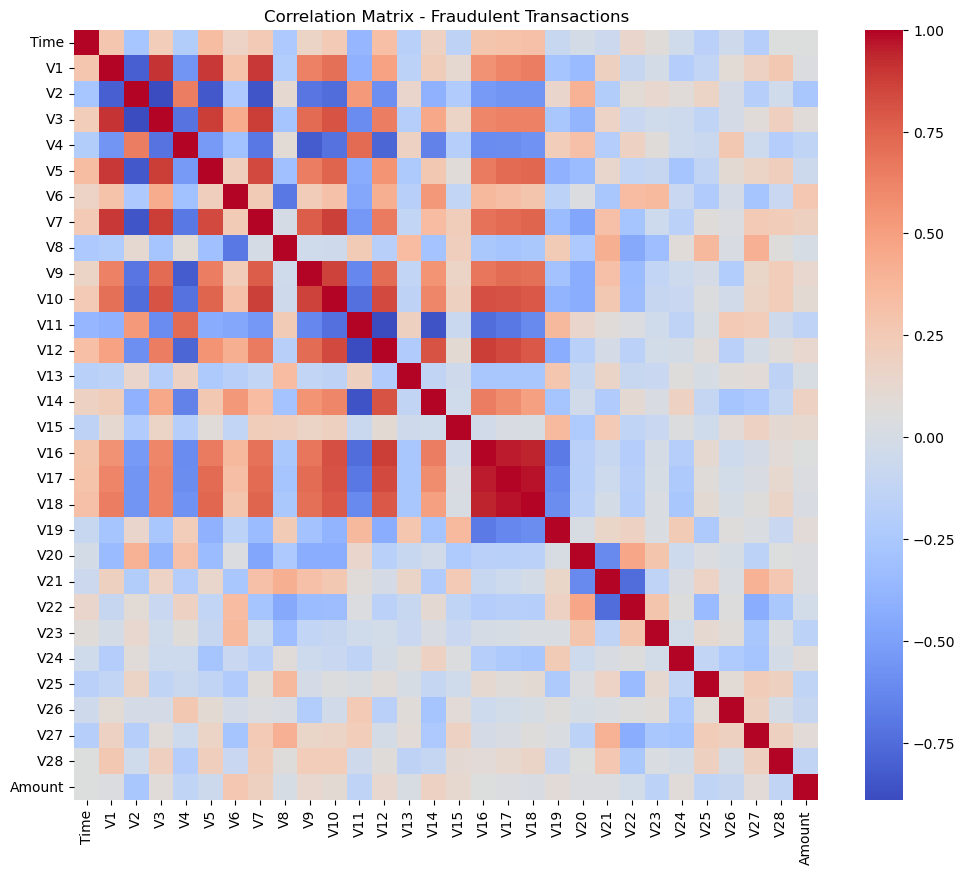

In [22]:
fraud_df = np.delete(fraud_df, -1, axis=1)  # Remove 'Class' column for correlation matrix
new_columns = columns[:-1]  # Exclude 'Class' from column names
correlation_matrix_fraud = np.corrcoef(fraud_df, rowvar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_fraud, xticklabels=new_columns, yticklabels=new_columns, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix - Fraudulent Transactions')
plt.show()

**1. Fraud has a stronger internal correlation structure than Non-Fraud**

Matrix observation:

- Many pairs of features Vx – Vy have correlation |corr| > 0.6 in Fraud.

- While for the entire dataset, PCA components are almost uncorrelated (corr ≈ 0).

Implications

- Fraud is not random: Fraud transactions have a consistent pattern, repeated many times, leading to a clear correlation structure.

- This reflects that:

    - Many fraud transactions have the same “template”,

    - Can be generated from the same tool, bot, or fraud technique.

This is an extremely important insight → Fraud is not random noise, but a group of patterned behaviors.

**2. V10–V18 cluster has particularly strong correlation in Fraud**

In the graph, we see the cluster: V9, V10, V12, V14, V15, V16, V17, V18

- Highly positively correlated with each other (dark red)

- Some pairs have strong negative correlation (dark blue)

Remarks

- This is a very important cluster of PCA components in describing Fraud behavior.

- When many PCA features continuously “move together” in Fraud → the model can detect them easily.

Many academic publications also point out that this PCA cluster is the place that contains the strongest information about Fraud.

**3. Amount has a certain correlation with some variables in Fraud**

In the whole dataset chart, Amount has almost no correlation with PCA components.

But in the Fraud chart:

- Amount has a correlation of about ±0.3 to ±0.5 with some Vx.

Significance

- In the Fraud group, the amount of money (Amount) is associated with characteristic behaviors.

- This reinforces that Amount is a strong categorical variable, especially when combined with PCA components.

**4. Time has some slight correlation → Fraud has active times**

In the whole dataset, Time has no correlation with anything.

But in the Fraud subset:

- Time has a slight negative/positive correlation with some Vx.

Implication

- Fraud transactions tend to follow certain times,
not completely random.

- This matches the previous plots:

    - Fraud is more concentrated in certain hours.

    - There are peak attacks.

**5. Fraud has a special multidimensional structure → very suitable for detection by ML models**

From this correlation matrix, we can conclude:

- Fraud has a centralized, non-distributed pattern.

- PCA variables have significant linear and nonlinear relationships.

- Logistic regression models are able to exploit these correlations to distinguish Fraud.

This is why linear algorithms such as Logistic Regression or SVM can detect Fraud quite well even though the original PCA data looks “unintelligible”.